In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from scipy.stats import norm
  

In [ ]:
. Оцените условную плотность процесса OU θ = (3, 1, 2), N = 1000,
∆ = 1 и вычисляем оценку максимального правдоподобия

In [8]:
def OU(X, kappa, alpha, sigma, dW, dt):
  dX = kappa * (alpha - X) * dt + sigma * dW
  return dX

In [30]:
def beta1(X, n):
  b01, b02, b03, b04, b05, b01_1, b02_1, b01_1 = 0, 0, 0, 0, 0, 0, 0, 0
  for i in range(1, n):
    b01 += (X[i] * X[i -1])
    b02 +=(X[i])
    b03 += (X[i - 1])
    b04 += (X[i - 1]**2)
    b05 += (X[i - 1])**2
  b01_1 = b01 / n
  b02_1 = b02 * b03 / (n ** 2)
  b04_1 = b05 / n
  b05_1 = b05 / (n **2)
  bet1 = (b01_1 - b02_1) / (b04_1 - b05_1)
  return bet1

In [32]:

def beta2(X, n, b1):
  b01_1,  b01_1 = 0, 0
  for i in range (1, n):
    b01_1 += (X[i] - b1 * X[i - 1])
  b01 = b01_1 / n
  bet2 = b01 / (1 - b1)
  return bet2

In [34]:
def beta3 (X, n, b1, b2):
  b03 = 0
  for i in range (1, n):
    b03 += (X[i] - b1 * X [i -1] - b2 * (1 - b1))** 2
  bet3 = b03 / n
  return bet3

In [47]:
kappa = 3
alpha = 1
sigma = 2
N = 1000
delta = 1 / N
dW = np.random.normal(0, np.sqrt(1 / N), N)


In [48]:
X_ou = np.zeros(N)
X_ou[0] = 10
for i in range(1, N):
    dX = OU(X_ou[i - 1], kappa, alpha, sigma, dW[i], 1 / N)
    X_ou[i] = X_ou[i - 1] + dX

In [49]:
b_1 = beta1(X_ou, len(X_ou))
b_2 = beta2(X_ou, len(X_ou), b_1)
b_3 = beta3(X_ou, len(X_ou), b_1, b_2)

In [42]:
b_1


0.21138084643593638

In [41]:
b_2

4.2007642470860365

In [43]:
b_3

2.9347658085747854

In [37]:
kappa_new = (-1 / delta) * np.log(b_1)
alpha_new = b_2
sigma_new = np.sqrt(2 * kappa_new * b_3 / (1 - b_1 ** 2))
#theta_new[j] = kappa_new, alpha_new, sigma_new

In [44]:
X_ou = np.zeros(N)
X_ou[0] = 10
for i in range(1, N):
    dX = OU(X_ou[i - 1], kappa_new, alpha_new, sigma_new, dW[i], 1 / N)
    X_ou[i] = X_ou[i - 1] + dX

In [45]:
b_1 = beta1(X_ou, len(X_ou))
b_2 = beta2(X_ou, len(X_ou), b_1)
b_3 = beta3(X_ou, len(X_ou), b_1, b_2)

In [46]:
b_1

-0.23888952630445437

In [50]:
b_2

4.018906866943037

In [51]:
b_3

2.5830799910243867

In [2]:
kappa = 0
alpha = 3
sigma = 2
N = 1000
delta = 1 / N
dW = np.random.normal(0, np.sqrt(1 / N), N)

In [3]:
def theta_2(X, delta, n):
  t1 = 0
  t2 = 0
  for i in range(1, n):
    t1 += X[i] * X[i - 1]
    t2 += X[i-1] ** 2
  t_2 = -np.log(t1 / t2) / delta
  return t_2

In [5]:
def theta_3(X, delta, n, t_2):
  t1 = 0
  t2 = 0
  for i in range(1, n):
    
    t1 += (X[i] - X[i - 1] * np.exp(-delta * t_2)) ** 2 
  t2 = (2 * t_2) / (n * (1 - np.exp(-2 * delta * t_2)))
  return t1 * t2

In [6]:
kappa = 0
alpha = 3
sigma = 2
N = 1000
delta = 1 / N
dW = np.random.normal(0, np.sqrt(1 / N), N)

In [36]:
X_ou = np.zeros(N)
X_ou[0] = 10
for i in range(1, N):
    dX = OU(X_ou[i - 1], 3, 0, 2, dW[i], 1 / N)
    X_ou[i] = X_ou[i - 1] + dX

In [37]:
th2 = theta_2(X_ou, delta, len(X_ou))
th2

3.0560940253125444

In [38]:
th3 = theta_3(X_ou, delta, len(X_ou), th2)
th3

4.191405771933543

In [39]:
np.sqrt(th3)

2.0472923025141143

In [41]:
kappa_new = th2
alpha_new = 0
sigma_new = np.sqrt(th3)
N = 1000
delta = 1 / N
dW = np.random.normal(0, np.sqrt(1 / N), N)

In [42]:
X_ou = np.zeros(N)
X_ou[0] = 10
for i in range(1, N):
    dX = OU(X_ou[i - 1], kappa_new, alpha_new, sigma_new, dW[i], 1 / N)
    X_ou[i] = X_ou[i - 1] + dX

In [43]:
th2 = theta_2(X_ou, delta, len(X_ou))
th2

3.762487591182159

In [44]:
th3 = theta_3(X_ou, delta, len(X_ou), th2)
th3

4.096569095331949

In [45]:
np.sqrt(th3)

2.023998294300652

In [46]:
pip install git+https://github.com/jkirkby3/pymle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/jkirkby3/pymle to /tmp/pip-req-build-glha6oab
  Running command git clone -q https://github.com/jkirkby3/pymle /tmp/pip-req-build-glha6oab
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for PyMLE: filename=PyMLE-0.0.1-py3-none-any.whl size=38015 sha256=9e93e839a708cee91b2e959ed023209f88299b2fcdc10558f8ff9381db75dd37
  Stored in directory: /tmp/pip-ephem-wheel-cache-jjn1ofhv/wheels/cd/1e/47/b1240ec565910918e972d8bc400bc27859de0658a5cc94b937
Successfully built PyMLE


In [76]:
from pymle.models import CKLS
from pymle.sim.Simulator1D import Simulator1D
from pymle.TransitionDensity import ExactDensity, EulerDensity
from pymle.fit.AnalyticalMLE import AnalyticalMLE
import numpy as np
import scipy.stats as st

In [77]:
def WP(N, T):
    W = np.zeros(N)  
    delta = T / N 
    for i in range (1, N):
        W[i] += W[i-1] + np.random.normal(0, np.sqrt(delta))
    return W

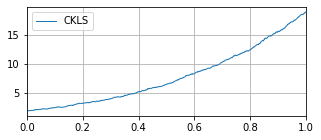

In [78]:
def CKLS(S, kappa, theta, sigma, gamma, dt, dW):
    return (kappa + theta * S) * dt + sigma * (S**gamma) * dW


N = 10000
T = 1
t, dt = np.linspace(0, T, N, retstep=True)
W = WP(N, T)
ckls = np.zeros(N)
ckls[0] = 2
kappa, theta, sigma, gamma = 1, 2, 0.5, 0.3

for i in range(1, N):
    dW = W[i] - W[i-1]
    ckls[i] = ckls[i-1] + CKLS(ckls[i-1], kappa, theta, sigma, gamma, dt, dW)

plt.figure ( figsize =(5, 2) )
plt.grid ()
plt.plot (t, ckls, linewidth =1.0, label="CKLS")
plt.legend()
plt.xlim(0, T)
plt.show()

In [94]:
from pymle.models import CKLS
model = CKLS() 
kappa, theta, sigma, gamma = 1, 2, 0.5, 0.3
model.params = np.array([kappa, theta, sigma, gamma])

S0 = 20
T = 1
N = 10000
dt = 1. / N
seed = None
param_bounds = [(0, 2), (1, 3), (0.1, 0.9), (0.1, 0.9)]
guess = np.array([0.5, 0.9, 0.9, 0.9])

K = 10
eu_params = []

for k in range(K):
    seed = np.random.randint(1, 10000)
    S0 = np.random.randint(10, 70)
    simulator = Simulator1D(S0=S0, M=T * N, dt=dt, model=model).set_seed(seed=seed)
    sample = simulator.sim_path()
    euler_est = AnalyticalMLE(sample, param_bounds, dt, density=EulerDensity(model)).estimate_params(guess).params
    eu_params.append(euler_est)

Initial Params: [0.5 0.9 0.9 0.9]
Initial Likelihood: 712.168371106796


/usr/local/lib/python3.8/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


`xtol` termination condition is satisfied.
Number of iterations: 68, function evaluations: 355, CG iterations: 186, optimality: 1.76e-04, constraint violation: 0.00e+00, execution time: 0.77 s.
Final Params: [1.23382463e-03 2.03008149e+00 4.97509468e-01 2.99839889e-01]
Final Likelihood: 26454.21562780675
Initial Params: [0.5 0.9 0.9 0.9]
Initial Likelihood: 994.4853960633309
`xtol` termination condition is satisfied.
Number of iterations: 125, function evaluations: 610, CG iterations: 344, optimality: 1.97e-04, constraint violation: 0.00e+00, execution time:  1.4 s.
Final Params: [0.00333157 2.03004022 0.50645652 0.29796045]
Final Likelihood: 26447.35329815279
Initial Params: [0.5 0.9 0.9 0.9]
Initial Likelihood: -5463.415036658527
`xtol` termination condition is satisfied.
Number of iterations: 144, function evaluations: 755, CG iterations: 426, optimality: 1.20e-03, constraint violation: 0.00e+00, execution time:  1.6 s.
Final Params: [0.02204068 2.03732491 0.43824033 0.32883142]
Fin

In [95]:
eu_params

[array([1.23382463e-03, 2.03008149e+00, 4.97509468e-01, 2.99839889e-01]),
 array([0.00333157, 2.03004022, 0.50645652, 0.29796045]),
 array([0.02204068, 2.03732491, 0.43824033, 0.32883142]),
 array([1.85675385, 1.99867207, 0.40617661, 0.34842121]),
 array([0.48050962, 1.98966335, 0.41964432, 0.33979225]),
 array([1.02146964e-03, 1.98671247e+00, 3.82380274e-01, 3.59925064e-01]),
 array([1.99816145, 1.957658  , 0.40793462, 0.34617651]),
 array([1.06176609, 1.97458871, 0.40506877, 0.34954558]),
 array([1.98079856, 1.97730865, 0.36131009, 0.37347091]),
 array([1.33266902, 2.01129126, 0.42445935, 0.34082039])]

In [96]:
np.mean(eu_params, axis = 0)

array([0.87382861, 1.99933411, 0.42491804, 0.33847837])

In [97]:
st.t.interval(0.95, len(eu_params) - 1, loc=np.mean(eu_params, axis = 0), scale=st.sem(eu_params, axis = 0))

(array([0.24915979, 1.98001776, 0.39203872, 0.32128341]),
 array([1.49849744, 2.01865046, 0.45779735, 0.35567333]))